# First Attempt

Initial attempt to fit data from a single subject to DDM, following the HDDM tutorial for a single subject

In [8]:
%matplotlib inline

In [14]:
import hddm

data = hddm.load_csv('../data/data_18333.csv')

model = hddm.HDDM(data, depends_on={'v': 'stim'})

model.find_starting_values()

model.sample(2000, burn=20)

-32.93647931839551
-32.93644253014742


/Users/constantinose/anaconda/envs/lang-dec/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2000 of 2000 complete in 4.0 sec

/Users/constantinose/anaconda/envs/lang-dec/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting t


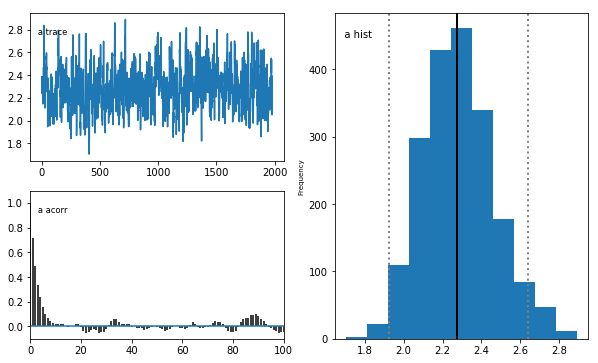

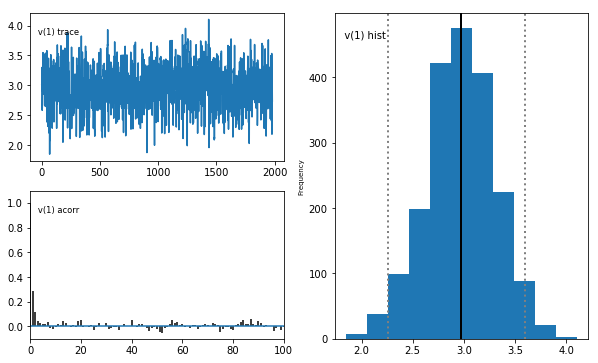

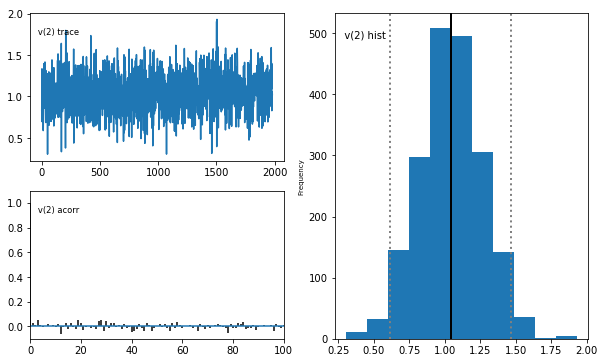

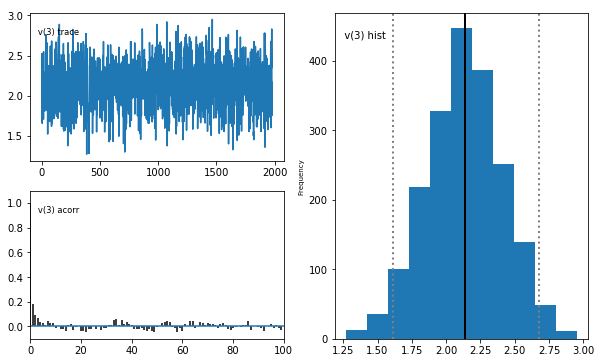

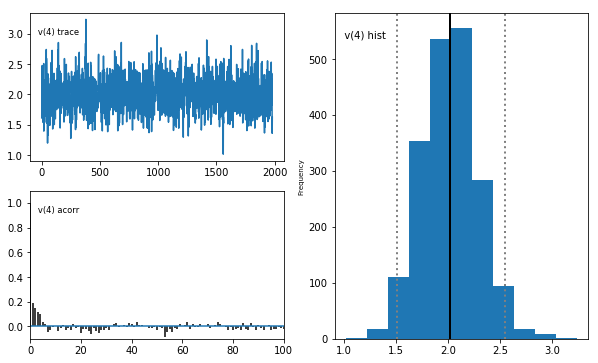

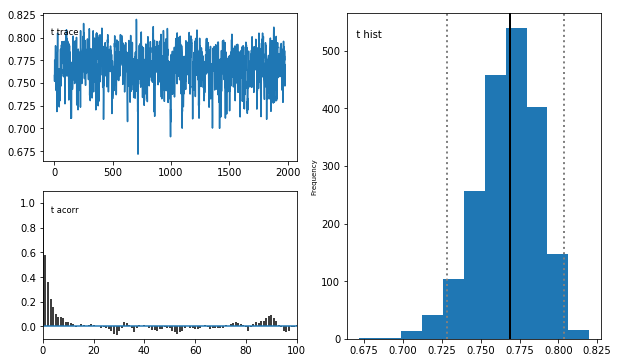

In [9]:
model.plot_posteriors()

Looks promising!

Let's formally check for convergence using the Gelman-Rubin R statistic

In [13]:
models = []

# Generate 5 models
for i in range(5):
    m = hddm.HDDM(data, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(5000, burn=20)
    models.append(m)
    
hddm.analyze.gelman_rubin(models)

-32.94124299191242
-32.93648453206572


/Users/constantinose/anaconda/envs/lang-dec/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5000 of 5000 complete in 10.1 sec-32.93703220187669
-32.93648224333695


/Users/constantinose/anaconda/envs/lang-dec/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


 [-----------------100%-----------------] 5000 of 5000 complete in 10.4 sec-32.93670179230718
-32.93646851135455
 [-----------------100%-----------------] 5000 of 5000 complete in 10.0 sec-32.93695318734018
-32.93650718712496
 [-----------------100%-----------------] 5000 of 5000 complete in 10.0 sec-32.936445603575685
-32.93643756856765
 [-----------------100%-----------------] 5000 of 5000 complete in 10.2 sec

{'a': 1.0010736698424982,
 't': 1.0012626692280349,
 'v(1)': 1.0001707741174821,
 'v(2)': 1.0001474271706527,
 'v(3)': 1.0003093914070633,
 'v(4)': 1.0000821617481879}

Values are close to 1 and not larger than 1.02, therefore models converge successfully!

In [15]:
model.print_stats()

          mean        std      2.5q       25q       50q       75q     97.5q       mc err
a      2.26773   0.167562   1.97512   2.14682   2.25718   2.38159   2.61205   0.00809349
v(1)   2.94522   0.328051   2.29032    2.7241   2.94998   3.16294   3.59288    0.0100696
v(2)   1.04049   0.218308  0.593181  0.894587   1.03739   1.19181   1.46868   0.00550852
v(3)   2.12712   0.275282   1.59061   1.93864   2.12665   2.31287   2.67025   0.00837645
v(4)   2.01726    0.25879   1.50342   1.84104   2.02172   2.19122    2.5177   0.00730294
t     0.769153  0.0192838  0.724504  0.757326  0.771419  0.783046  0.800667  0.000821715
DIC: 55.860151
deviance: 50.208791
pD: 5.651361


/Users/constantinose/anaconda/envs/lang-dec/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Compare the posterior for different drift-rate conditions

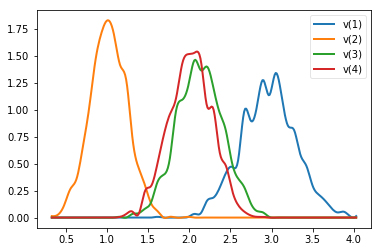

In [17]:
v_1, v_2, v_3, v_4 = model.nodes_db.node[['v(1)', 'v(2)', 'v(3)', 'v(4)']]

hddm.analyze.plot_posterior_nodes([v_1, v_2, v_3, v_4])